In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error






In [18]:
df = pd.read_csv('AmesHousing.csv')
print("Dataset loaded!")
print ("-------------------------------------")
print(df.info())

Dataset loaded!
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg T

In [20]:


# Clean the dataset
# Drop columns with more than 50% missing values
missing_fraction = df.isnull().mean()
df = df.drop(columns=missing_fraction[missing_fraction > 0.5].index)

# Drop identifier columns if present
df = df.drop(columns=['Order', 'PID'], errors='ignore')

# Drop remaining rows with null values
df = df.dropna()

# Encode categorical columns using one-hot encoding
df = pd.get_dummies(df, drop_first=True)



In [22]:
# Set up features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the models

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_preds = gbr_model.predict(X_test)



 Linear Regression 
   MAE: 231468552447543.31 
   RMSE: 3273302111092656.00

 Gradient Boosting 
   MAE: 17512.01 
   RMSE: 32360.45



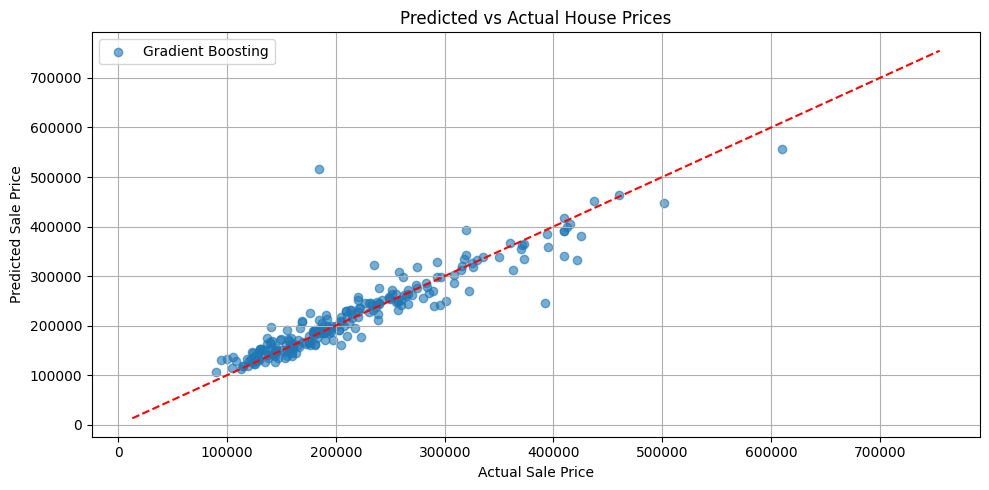

In [24]:
# Evaluation Function
def evaluate(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f" {name} \n   MAE: {mae:.2f} \n   RMSE: {rmse:.2f}\n")

# Evaluate both models
evaluate("Linear Regression", y_test, lr_preds)
evaluate("Gradient Boosting", y_test, gbr_preds)

# Visualize Predicted vs Actual Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, gbr_preds, alpha=0.6, label="Gradient Boosting")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ames Housing Price Prediction: Results & Final Thoughts
### What Was Done
- Data: Used the Ames Housing dataset (almost 3,000 homes, many features).
- Goal: Predict house sale prices based on property features.
- Preprocessing: Cleaned the data by dropping columns with lots of missing values, removed IDs, filled in missing data, and used one-hot encoding for categories.
- Models: Compared Linear Regression and Gradient Boosting Regressor.
### Key Results
- Gradient Boosting wins: Linear Regression performed very poorly (huge errors), while Gradient Boosting did much better, with a Mean Absolute Error (MAE) of about $17,500 and RMSE around $32,360.
- Prediction quality: The scatter plot of predicted vs. actual prices shows that Gradient Boosting’s predictions generally follow the real prices, though there’s still some spread.
### Final Thoughts
- Model choice matters: For complex, real-world data like this, advanced models (like Gradient Boosting) can capture patterns that simple linear models miss.
- Further improvements: Tuning the model, feature engineering, or trying other algorithms could boost accuracy even more.
- Takeaway: Good data cleaning and the right model make a big difference in predicting house prices.


